In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
SCRIPT_DIR = os.getcwd()
PARENT_DIR = os.path.dirname(SCRIPT_DIR)
DATA_FOLDER_PATH = os.path.join(PARENT_DIR, 'data')
CSV_FOLDER_PATH = os.path.join(DATA_FOLDER_PATH, 'csv')

In [3]:
poster_dfs = []
for filename in os.listdir(CSV_FOLDER_PATH):
    if 'poster' in filename.lower():
        csv_path = os.path.join(CSV_FOLDER_PATH, filename)
        df = pd.read_csv(csv_path)
        truncated_df = df[['title', 'content', 'header', 'year']]
        poster_dfs.append(truncated_df)

In [4]:
poster_df = pd.concat(poster_dfs, ignore_index=True)

In [5]:
recat_dict = {
    'Developmental Genetics and Gene Function': 'Developmental Genetics',
    'Genetic Counseling': 'Genetic Counseling',
    'Complex Traits': 'Complex Traits and Polygenic Disorders',
    'Complex Traits and Polygenic Disorders': 'Complex Traits and Polygenic Disorders',
    'Bioinformatics and Computational Approaches': 'Bioinformatics',
    'Pharmacogenomics': 'PGx',
    'Cardiovascular Diseases': 'Cardiology',
    'Prenatal, Perinatal, and Reproductive Genetics': 'Reproductive genetics',
    'Psychiatric Genetics, Neurogenetics and Neurodegeneration': 'Psychiatric Genetics, Neurogenetics and Neurodegeneration',
    'Statistical Genetics and Genetic Epidemiology': 'Statistical Genetics and Genetic Epidemiology',
    'Epigenetics and Gene Regulation': 'Epigenetics',
    'Molecular Phenotyping and Omics Technologies': 'To split',
    'Bioinformatics and Genomic Technology': 'Bioinformatics',
    'Molecular Effects of Genetic Variation': 'Genetic Variation',
    'Pharmacogenetics': 'PGx',
    'Cytogenetics': 'Cytogenetics',
    'Prenatal, Perinatal, Reproductive, and Developmental Genetics': 'To split',
    'Cancer': 'Cancer',
    'Evolution and Population Genetics': 'Evolution and Population Genetics',
    'Clinical Genetics and Dysmorphology': 'Clinical Genetic Testing',
    'Evolutionary and Population Genetics': 'Evolution and Population Genetics',
    'Prenatal, Perinatal, and Developmental Genetics': 'To split',
    'Epigenetics': 'Epigenetics',
    'Genome Structure, Variation, and Function': 'To split',
    'Genome Structure, Variation and Function': 'To split',
    'Genome Structure and Function': 'Genome Structure and Function',
    'Ethical, Legal, Social and Policy Issues in Genetics': 'ELSI',
    'Psychiatric Genetics, Neurogenetics, and Neurodegeneration': 'Psychiatric Genetics, Neurogenetics and Neurodegeneration',
    'Health Services Research': 'Health Services Research',
    'Cancer Genetics': 'Cancer',
    'Development': 'Developmental Genetics',
    'Prenatal, Perinatal and Reproductive Genetics': 'Reproductive genetics',
    'Ethical, Legal, Social, and Policy Issues in Genetics': 'ELSI',
    'Therapy for Genetic Disorders': 'Therapy for Genetic Disorders',
    'Cardiovascular Phenotypes': 'Cardiology',
    'Molecular and Cytogenetic Diagnostics': 'Clinical Genetic Testing',
    'Clinical Genetic Testing': 'Clinical Genetic Testing',
    'Genetic Counseling, ELSI, Education, and Health Services Research': 'To split',
    'Genetic Therapies': 'Therapy for Genetic Disorders',
    'Mendelian Phenotypes': 'Mendelian Phenotypes',
    'Precision Medicine, Pharmacogenomics, and Genetic Therapies': 'To split',
    'Genetic Counseling, ELSI, Education, and Health Services': 'To split',
    'Late Breaking Posters on COVID-19': 'COVID-19',
    'Genetic, Genomic, and Epigenomic Resources and Databases': 'Resources',
    'Genetics/Genomics Education': 'Education',
    'Cardiovascular Genetics': 'Cardiology',
    'Genetic, Genomic, and Epigenomic Annotations, Databases and Resources': 'Resources',
    'Molecular Basis of Mendelian Disorders': 'Mendelian Phenotypes',
    'Omics Technologies': 'Omics Technologies',
    'Metabolic Disorders': 'Clinical Genetic Testing'
    }

In [6]:
recat_df = poster_df.copy()
recat_df['header'] = recat_df['header'].replace(recat_dict)

In [7]:
recat_df[recat_df['header'] == 'Molecular investigations were']

,title,content,header,year
17457,NaN,performed on leukocyte DNA and included methyl...,Molecular investigations were,2022


In [32]:
recat_df['header'].value_counts().reset_index()

,index,header
0,Complex Traits and Polygenic Disorders,4369
1,Mendelian Phenotypes,3020
2,Statistical Genetics and Genetic Epidemiology,2739
3,Cancer,2659
4,Clinical Genetic Testing,2635
5,Bioinformatics,2474
6,To split,2025
7,Epigenetics,1358
8,Evolution and Population Genetics,1219
9,Cardiology,1177


In [46]:
training_data = recat_df[~recat_df['header'].isin(['To split', 'COVID-19', 'Molecular investigations were'])]
training_data.to_csv(os.path.join(DATA_FOLDER_PATH, 'training_data.csv'))

In [51]:
training_data.header.unique()

,title,content,header,year
0,The functional MTHFR C677T polymorphism modula...,"5,10-methylenetetrahydrofolate reductase (MTHF...",Epigenetics,2015
1,Alignment and Methylation Analysis of Tandem R...,Global DNA hypomethylation is a common epigene...,Epigenetics,2015
2,Integrating single-base resolution quantitativ...,Recent technological advances driving the next...,Epigenetics,2015
3,Characterization of differential DNA methylati...,CpG DNA methylation (DNAm) is an established d...,Epigenetics,2015
4,HiTMAP: A High-Throughput Methylation Analysis...,DNA methylation plays essential roles in gene ...,Epigenetics,2015
...,...,...,...,...
28319,Stochastic gene activity in whole blood highli...,"In transcriptome analysis, the number and repe...",Genome Structure and Function,2016
28320,Biased and coherent expression patterns of hum...,The gonadal functions of human Y chromosome ge...,Genome Structure and Function,2016
28321,Genome assembly and full-length transcript pro...,"Single-molecule, real-time (SMRT) sequencing t...",Genome Structure and Function,2016
28322,Repeat elements expression proﬁ le across diﬀ...,Next Generation RNA Sequencing technology enab...,Genome Structure and Function,2016


In [47]:
non_poster_dfs = []
for filename in os.listdir(CSV_FOLDER_PATH):
    if 'poster' not in filename.lower():
        csv_path = os.path.join(CSV_FOLDER_PATH, filename)
        df = pd.read_csv(csv_path)
        truncated_df = df[['title', 'content', 'year']]
        non_poster_dfs.append(truncated_df)
        
non_poster_dfs.append(recat_df[recat_df['header'].isin(['To split'])][['title', 'content', 'year']])

In [50]:
unlabel_data = pd.concat(non_poster_dfs, ignore_index=True)
unlabel_data.to_csv(os.path.join(DATA_FOLDER_PATH, 'unlabel_data.csv'))

In [52]:
unlabel_data

,title,content,year
0,Interpretation of whole genome sequencing for ...,"Building on the 100,000 Genomes Project, the N...",2023
1,Boosting Rare Disease diagnostic yield with Ar...,Introduction The ultimate goal of variant inte...,2023
2,Heterozygous Loss-of-Function Variants in SMC...,Heterozygous missense variants and in-frame in...,2023
3,Driving Diagnostic Advancements in Rare Diseas...,The Genomic Answers for Kids (GA4K) program ai...,2023
4,Clinical utility of deep-RNAseq in Mendelian d...,RNAseq on patient-derived tissues/cells has em...,2023
...,...,...,...
7689,Implementing genomics into clinical practice: ...,Widespread change within and across organisati...,2016
7690,Improving access to genetic services: Needs as...,Purpose To strengthen and support the geneti...,2016
7691,Disseminating best practice in ELSI research t...,Precision Medicine promises to improve clinica...,2016
7692,Eﬀ ect assessment of genome research supporti...,"Most of the times, research in innovative ﬁ e...",2016


In [44]:
pivot = pd.pivot_table(training_data, index='header', columns='year', aggfunc='size')

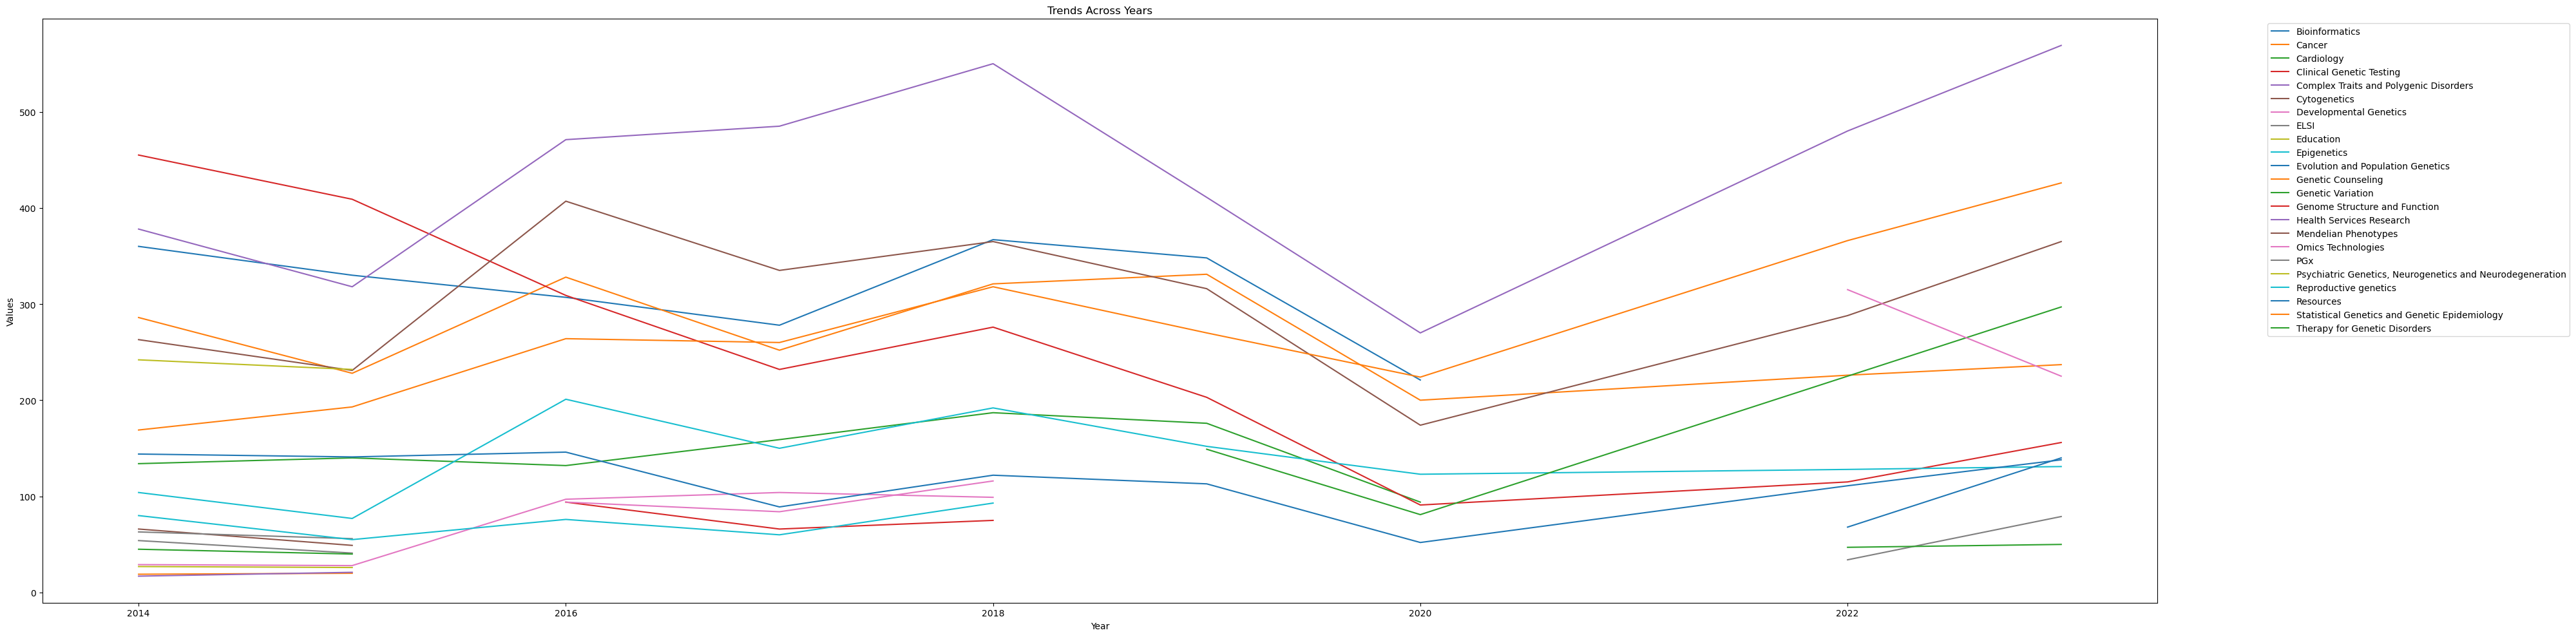

In [45]:
plt.figure(figsize=(40, 10))
for header in pivot.index:
    plt.plot(pivot.columns[1:], pivot.loc[header].values[1:], label=header)

plt.title('Trends Across Years')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.tight_layout()
plt.show()